In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading 'tips' dataset from seaborn 

tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


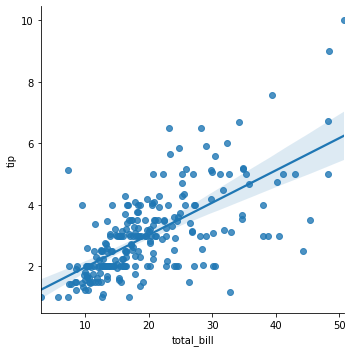

In [4]:
# Plot regression plot

sns.lmplot('total_bill','tip',tips)

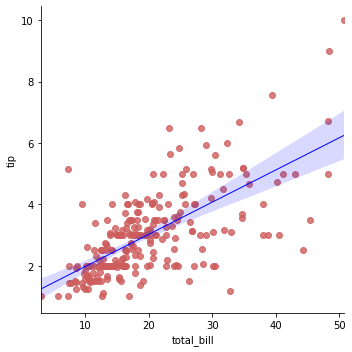

In [11]:
# can customize plot

sns.lmplot('total_bill','tip',tips,
          scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'blue'})

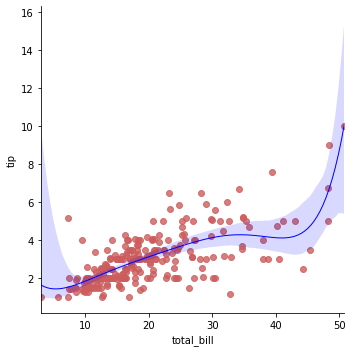

In [15]:
# above is a first order trend line.  We can do multiple higher orders.

sns.lmplot('total_bill','tip',tips, order=6,
          scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'blue'})

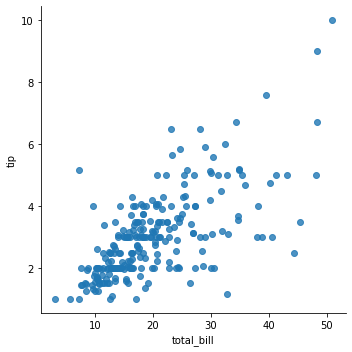

In [16]:
# not fit a regression at all, just do a scatter plot

sns.lmplot('total_bill','tip',tips, fit_reg=False)



In [19]:
# to get the percentage of the tips

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [20]:
tips['tip_pct']=100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


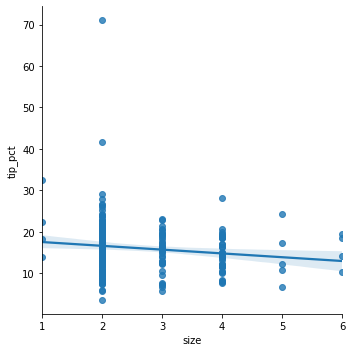

In [23]:
sns.lmplot('size','tip_pct', tips)

In [24]:
# use Jitter to make it easier to read.  

import webbrowser
url = 'http://en.wikipedia.org/wiki/Jitter'

webbrowser.open(url)

True

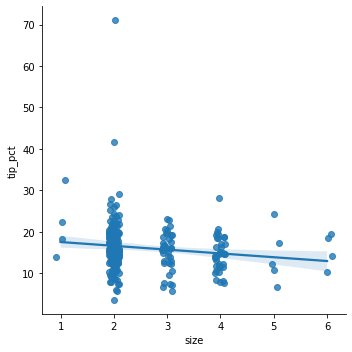

In [27]:
sns.lmplot('size','tip_pct',tips, x_jitter=.1)

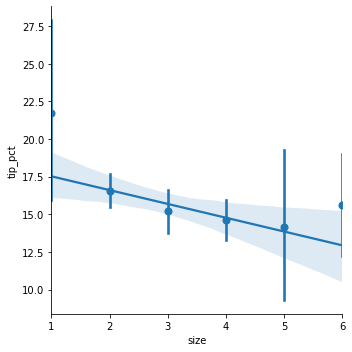

In [28]:
# estimate the tendency of each bin 

sns.lmplot('size','tip_pct',tips,x_estimator=np.mean)

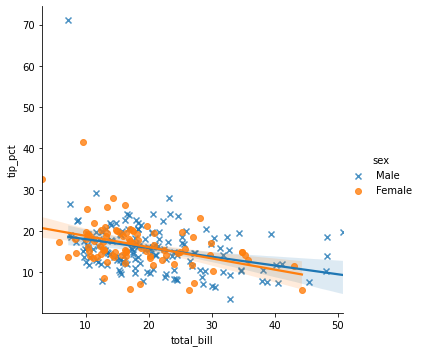

In [29]:
# use hue to automatically find subsets along a column

sns.lmplot('total_bill','tip_pct',tips, hue='sex',markers=['x','o'])

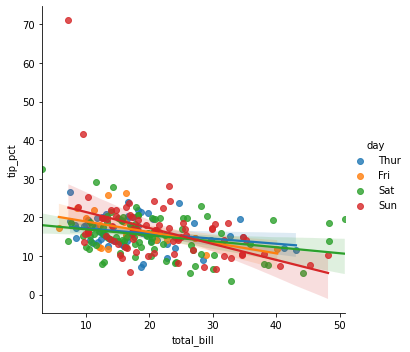

In [30]:
# does the day make a difference in how much the tip is

sns.lmplot('total_bill','tip_pct',tips,hue='day')

In [31]:
# seaborn also supports local regression model fitting (LOWESS) 
url2 = 'http://en.wikipedia.org/wiki/Local_regression'
webbrowser.open(url2)

True

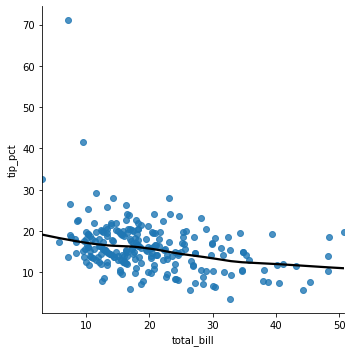

In [32]:
sns.lmplot('total_bill','tip_pct',tips,lowess=True,line_kws={'color':'black'})

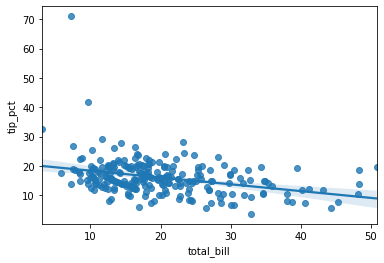

In [33]:
#lmplot is using a lower level function (regplot- regression plot)


sns.regplot('total_bill','tip_pct',tips)

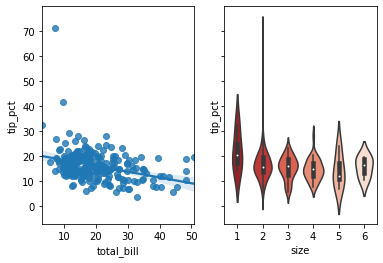

In [40]:
#can be added to an existing subplot without changing anything 
#subplot(1,2) --> plot that has 1 row 2 columns 

fig, (axis1,axis2) = plt.subplots(1,2, sharey=True)

sns.regplot('total_bill','tip_pct',tips,ax=axis1)
sns.violinplot(tips['size'],tips['tip_pct'],palette='Reds_r',ax=axis2)